# SELECTING THE BEST MODEL TO PREDICT CAR PRICE USING REGRESSION

### BUDI SALEH, Created on 12 Oct  20

Using the SDS challenge  I would like to develop a model to predict the used car price that customers are willing to pay given the following attributes: 

- manufacturer_name: the name of the car manufacturer
- model_name: the name of the car model
- transmission: the type of transmission the car has
- color: the body color of the car
- odometer_value: odometer state in kilometers
- year_produced: the year the car was produced
- engine_fuel: the fuel type of the engine of the car
- engine_has_gas: whether or not the car has a propane tank with tubing
- engine_type: the engine type of the car
- engine_capacity: capacity of the engine in liters
- body_type: the of body the car has
- has_warranty: whether the car has warranty
- state: the state of the car (new, owned, etc.)
- drivetrain: type of drivetrain (front, rear, all)
- feature_1 - feature_9: these features are boolean values about properties of the car
- duration_listed: the number of days the car is listed in the catalog
- price_usd: price of the car in USD

The model should predict: 
- Car Price

This exercise to find the best regression model based on the 
- Mean square error
- Mean absolute error
- r2 score

\begin{equation*}
MSE = {\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}
\end{equation*}
<br>

Linear Model are using as follow :
1. Linear regression as baseline
2. Ridge
3. Lasso
4. KNN
5. Decission Tree
6. Random Forrest
7. Support Vector


#### Import the library

In [1]:
import matplotlib as mp 
import sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
import category_encoders as ce
from sklearn import preprocessing 
from math import sqrt
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
%matplotlib inline

####  Read using panda for public cars dataset

In [3]:
df = pd.read_csv('public_cars.csv')

In [4]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


#### Explarotary Data Analysis

In [5]:
df.describe()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000
mean,248803.130515,2002.939690,2.054232,80.344407,6630.598604
std,135760.720763,8.048786,0.667535,112.656926,6412.213626
min,0.000000,1950.000000,0.200000,0.000000,1.000000
25%,158146.500000,1998.000000,1.600000,23.000000,2145.857500
50%,250000.000000,2003.000000,2.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,91.000000,8950.000000
max,1000000.000000,2019.000000,7.500000,2232.000000,50000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30824 entries, 0 to 30823
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30824 non-null  object 
 1   model_name         30824 non-null  object 
 2   transmission       30824 non-null  object 
 3   color              30824 non-null  object 
 4   odometer_value     30824 non-null  int64  
 5   year_produced      30824 non-null  int64  
 6   engine_fuel        30824 non-null  object 
 7   engine_has_gas     30824 non-null  bool   
 8   engine_type        30824 non-null  object 
 9   engine_capacity    30816 non-null  float64
 10  body_type          30824 non-null  object 
 11  has_warranty       30824 non-null  bool   
 12  state              30824 non-null  object 
 13  drivetrain         30824 non-null  object 
 14  feature_0          30824 non-null  bool   
 15  feature_1          30824 non-null  bool   
 16  feature_2          308

In [7]:
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      8
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [10]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30819,Mazda,Millenia,automatic,green,360493,1999,gasoline,False,gasoline,2.5,...,False,False,True,True,False,False,False,True,66,2000.0
30820,Audi,A3,automatic,grey,117000,2009,gasoline,False,gasoline,1.4,...,True,True,False,False,False,True,True,True,58,8800.0
30821,Mazda,626,mechanical,black,333000,1997,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,True,87,1400.0
30822,Audi,A6,automatic,violet,530000,1995,gasoline,False,gasoline,2.6,...,True,False,False,False,False,False,True,True,52,3500.0


#### Using label encoder 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30816 entries, 0 to 30823
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30816 non-null  object 
 1   model_name         30816 non-null  object 
 2   transmission       30816 non-null  object 
 3   color              30816 non-null  object 
 4   odometer_value     30816 non-null  int64  
 5   year_produced      30816 non-null  int64  
 6   engine_fuel        30816 non-null  object 
 7   engine_has_gas     30816 non-null  bool   
 8   engine_type        30816 non-null  object 
 9   engine_capacity    30816 non-null  float64
 10  body_type          30816 non-null  object 
 11  has_warranty       30816 non-null  bool   
 12  state              30816 non-null  object 
 13  drivetrain         30816 non-null  object 
 14  feature_0          30816 non-null  bool   
 15  feature_1          30816 non-null  bool   
 16  feature_2          308

In [12]:
le = preprocessing.LabelEncoder() 

In [13]:
df[['manufacturer_name','model_name', 'transmission','color','engine_fuel','engine_type','body_type','state','drivetrain']]= df[['manufacturer_name','model_name', 'transmission','color','engine_fuel','engine_type','body_type','state','drivetrain']].apply(le.fit_transform)

In [14]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,14,503,1,1,245000,2006,2,False,1,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,12,350,0,8,265542,2002,2,False,1,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,14,533,1,1,168000,2009,0,False,0,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,30,168,1,6,225522,2008,2,False,1,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,2,190,1,0,370000,1991,2,False,1,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


##### Change Bolean to integer

In [15]:
df[['engine_has_gas','has_warranty','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']]=df[['engine_has_gas','has_warranty','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']].astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30816 entries, 0 to 30823
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  30816 non-null  int32  
 1   model_name         30816 non-null  int32  
 2   transmission       30816 non-null  int32  
 3   color              30816 non-null  int32  
 4   odometer_value     30816 non-null  int64  
 5   year_produced      30816 non-null  int64  
 6   engine_fuel        30816 non-null  int32  
 7   engine_has_gas     30816 non-null  int32  
 8   engine_type        30816 non-null  int32  
 9   engine_capacity    30816 non-null  float64
 10  body_type          30816 non-null  int32  
 11  has_warranty       30816 non-null  int32  
 12  state              30816 non-null  int32  
 13  drivetrain         30816 non-null  int32  
 14  feature_0          30816 non-null  int32  
 15  feature_1          30816 non-null  int32  
 16  feature_2          308

In [17]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,14,503,1,1,245000,2006,2,0,1,1.6,...,0,0,0,0,0,0,0,0,7,4250.0
1,12,350,0,8,265542,2002,2,0,1,3.3,...,0,0,0,0,0,0,0,0,133,4000.0
2,14,533,1,1,168000,2009,0,0,0,1.8,...,0,1,0,0,1,1,1,1,0,10900.0
3,30,168,1,6,225522,2008,2,0,1,1.8,...,1,0,0,1,0,0,1,1,20,6999.0
4,2,190,1,0,370000,1991,2,0,1,1.8,...,0,0,0,0,0,0,0,1,160,1600.0


#### Visual the data

###### Using pairplot to see the corelation

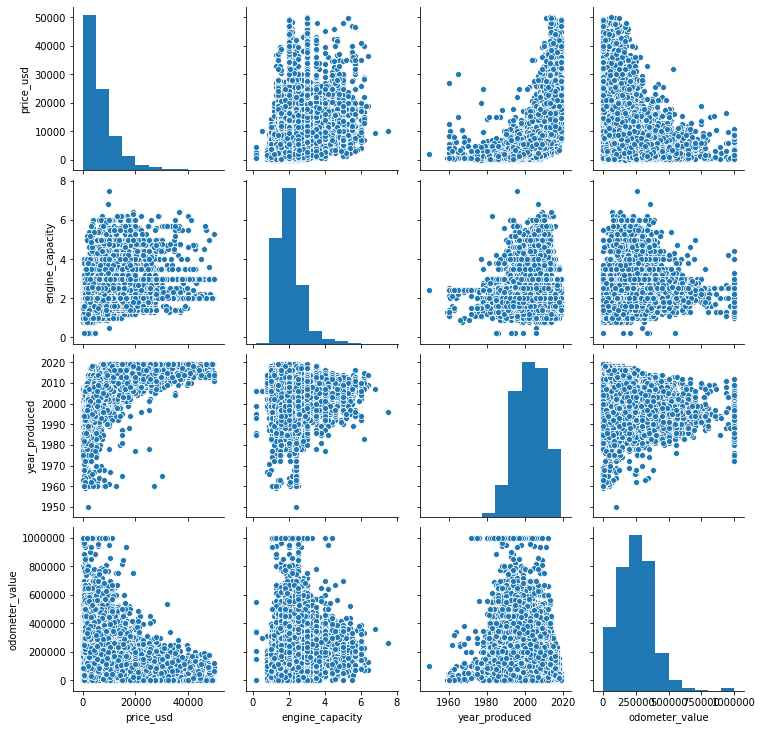

In [18]:
sns.pairplot(df[['price_usd','engine_capacity','year_produced','odometer_value']])

From the graph, it can seen that there are relation with regression 

##### Create a correlation heatmap

In [19]:
corr = df.corr()

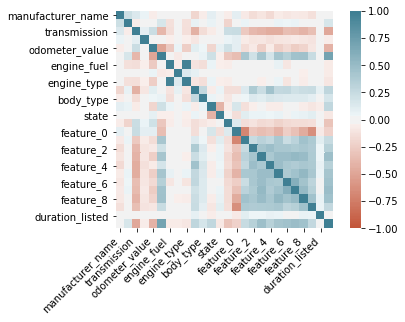

In [20]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Correlation table

In [21]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Table")\
    .set_precision(2)\
    .set_table_styles(magnify())

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
manufacturer_name,1.00,0.22,0.15,0.05,-0.05,0.00,-0.03,-0.03,-0.03,-0.20,-0.05,0.09,-0.04,-0.06,0.10,-0.07,-0.15,-0.10,-0.16,-0.07,-0.09,-0.07,-0.08,-0.12,-0.01,-0.03
model_name,0.22,1.00,-0.05,0.03,-0.03,0.17,-0.12,0.01,-0.12,0.07,0.02,0.06,-0.02,-0.20,-0.02,0.05,-0.01,0.03,0.00,0.05,0.05,0.05,0.03,-0.01,0.01,0.16
transmission,0.15,-0.05,1.00,0.10,0.23,-0.39,-0.14,-0.02,-0.13,-0.43,-0.15,-0.07,0.01,0.23,0.25,-0.28,-0.37,-0.40,-0.44,-0.44,-0.34,-0.36,-0.40,-0.33,-0.03,-0.47
color,0.05,0.03,0.10,1.00,0.02,-0.03,-0.04,0.00,-0.04,-0.10,-0.03,-0.01,0.01,0.06,0.09,-0.07,-0.10,-0.09,-0.12,-0.11,-0.09,-0.08,-0.09,-0.12,-0.00,-0.06
odometer_value,-0.05,-0.03,0.23,0.02,1.00,-0.49,-0.26,0.05,-0.25,0.11,0.04,-0.19,0.09,0.20,0.10,-0.15,-0.07,-0.23,-0.07,-0.24,-0.16,-0.25,-0.21,-0.09,-0.00,-0.42
year_produced,0.00,0.17,-0.39,-0.03,-0.49,1.00,0.00,-0.07,-0.02,0.01,0.06,0.21,-0.04,-0.29,-0.34,0.42,0.20,0.43,0.19,0.44,0.34,0.46,0.47,0.25,-0.02,0.71
engine_fuel,-0.03,-0.12,-0.14,-0.04,-0.26,0.00,1.00,-0.06,0.97,-0.11,-0.15,0.05,-0.05,-0.05,-0.00,-0.01,-0.02,-0.03,0.00,0.07,-0.09,-0.01,-0.03,0.02,-0.01,-0.07
engine_has_gas,-0.03,0.01,-0.02,0.00,0.05,-0.07,-0.06,1.00,0.13,0.08,0.03,-0.02,0.01,-0.01,0.00,-0.01,-0.01,-0.03,0.01,-0.03,-0.03,-0.03,-0.04,-0.01,0.02,-0.06
engine_type,-0.03,-0.12,-0.13,-0.04,-0.25,-0.02,0.97,0.13,1.00,-0.09,-0.14,0.05,-0.05,-0.06,0.01,-0.01,-0.03,-0.04,-0.00,0.06,-0.10,-0.03,-0.05,0.01,-0.00,-0.09
engine_capacity,-0.20,0.07,-0.43,-0.10,0.11,0.01,-0.11,0.08,-0.09,1.00,0.27,-0.06,0.05,-0.14,-0.14,0.14,0.38,0.24,0.45,0.27,0.28,0.20,0.24,0.25,0.08,0.30


There are correlation for price to all columns with positive correlation and negative with year renovated

###### Plot histogram

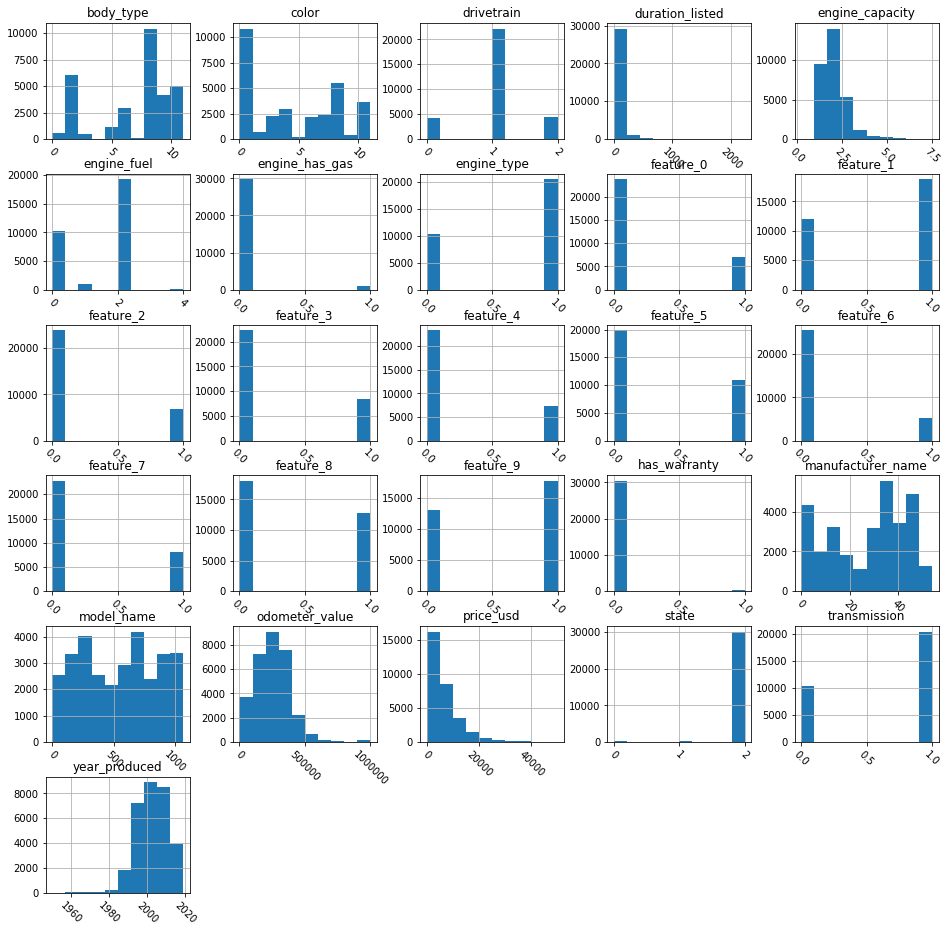

In [22]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

###### Using boxplot to see the outliers

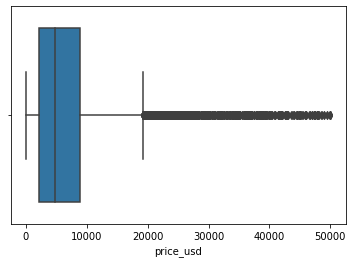

In [23]:
sns.boxplot(df.price_usd)

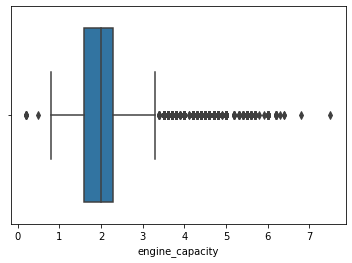

In [24]:
sns.boxplot(df.engine_capacity)

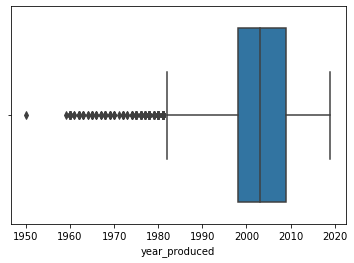

In [25]:
sns.boxplot(df.year_produced)

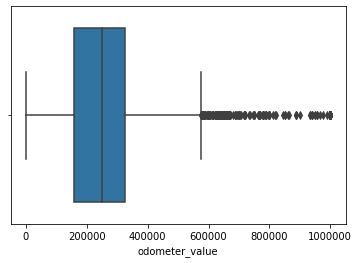

In [26]:
sns.boxplot(df.odometer_value)

From the above it was seen that the price usd have so many outliers, so we need to do the cleaning by using filtering the data 

###### Filtering the data and select the price usd ot below 30,000

In [27]:
df.price_usd.sort_values(ascending=False).head()

2169     50000.0
27666    50000.0
143      49950.0
30270    49900.0
20123    49900.0
Name: price_usd, dtype: float64

It was seen that there are range so high

In [28]:
df[df.price_usd <= 30000].count()

manufacturer_name    30448
model_name           30448
transmission         30448
color                30448
odometer_value       30448
year_produced        30448
engine_fuel          30448
engine_has_gas       30448
engine_type          30448
engine_capacity      30448
body_type            30448
has_warranty         30448
state                30448
drivetrain           30448
feature_0            30448
feature_1            30448
feature_2            30448
feature_3            30448
feature_4            30448
feature_5            30448
feature_6            30448
feature_7            30448
feature_8            30448
feature_9            30448
duration_listed      30448
price_usd            30448
dtype: int64

In [29]:
df = df[df.price_usd <= 30000]
df.shape

(30448, 26)

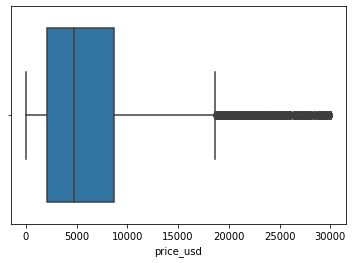

In [30]:
sns.boxplot(df.price_usd)

Now the outliers has reduced

###### Select the X and Y

In [31]:
df3 = df

In [32]:
df3.describe()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
count,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,...,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000,30448.000000
mean,27.710326,541.679585,0.672721,4.487782,250995.343537,2002.779066,1.311252,0.035109,0.667105,2.046187,...,0.219489,0.270198,0.236107,0.349711,0.164510,0.256207,0.411061,0.575571,80.402227,6250.499066
std,15.880100,311.931033,0.469228,3.590126,134897.847208,7.960599,0.957110,0.184058,0.471257,0.657630,...,0.413907,0.444069,0.424696,0.476886,0.370744,0.436545,0.492034,0.494264,112.790093,5417.720073
min,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,238.000000,0.000000,1.000000,160000.000000,1997.000000,0.000000,0.000000,0.000000,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,2100.000000
50%,31.000000,547.000000,1.000000,4.000000,250000.000000,2003.000000,2.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000,4700.000000
75%,39.000000,801.000000,1.000000,8.000000,325896.250000,2009.000000,2.000000,0.000000,1.000000,2.300000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,91.000000,8700.000000
max,54.000000,1067.000000,1.000000,11.000000,1000000.000000,2019.000000,4.000000,1.000000,1.000000,7.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2232.000000,30000.000000


Need to do scaling the data using data scaler due to different in standard deviation and mean

In [33]:
y = df3['price_usd']

In [34]:
X = df3.drop(columns =['price_usd'])

In [35]:
X.shape

(30448, 25)

In [36]:
y.shape

(30448,)

###### Use the datascaler 

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

In [38]:
print(X_scaled)

[[0.25925926 0.47141518 1.         ... 0.         0.         0.0031362 ]
 [0.22222222 0.32802249 0.         ... 0.         0.         0.05958781]
 [0.25925926 0.4995314  1.         ... 1.         1.         0.        ]
 ...
 [0.03703704 0.20337395 0.         ... 1.         1.         0.02598566]
 [0.55555556 0.16213683 1.         ... 0.         1.         0.03897849]
 [0.03703704 0.20712277 0.         ... 1.         1.         0.02329749]]


In [39]:
X_scaled.shape

(30448, 25)

In [40]:
y.shape

(30448,)

In [41]:
y = y.values.reshape(-1,1)

In [42]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)

##### Split the dataset

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = .25, random_state = 3)

#### Regression Model

#### 1. Linear Regression as baseline

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred_lin = regressor.predict(X_test)

In [46]:
y_train_lin = regressor.predict(X_train)

In [47]:
print("Train Results for Linear regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_lin)))
print("R-squared: ", rs(y_train, y_train_lin))
print("Mean Absolute Error: ", mae(y_train, y_train_lin))

Train Results for Linear regression:
*******************************
Root mean squared error:  0.09611229320768393
R-squared:  0.7183359017126063
Mean Absolute Error:  0.06613818858306854


In [48]:
RMSE_lin = sqrt(mse(y_train, y_train_lin))
R_square_lin = rs(y_train, y_train_lin)
MAE_lin = mae(y_train, y_train_lin)

In [49]:
print("Test Results for Linear regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_lin)))
print("R-squared: ", rs(y_test, y_pred_lin))
print("Mean Absolute Error: ", mae(y_test, y_pred_lin))

Test Results for Linear regression:
*******************************
Root mean squared error:  0.09669116847938354
R-squared:  0.7084416184798832
Mean Absolute Error:  0.06673399444963907


#### Ridge Regression

In [50]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_Ridge = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_Ridge.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [51]:
model_Ridge.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [52]:
## Predict Train results
y_train_ridge = model_Ridge.predict(X_train)

In [53]:
## Predict Test results
y_pred_ridge = model_Ridge.predict(X_test)

In [54]:
print("Train Results for Ridge regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_ridge)))
print("R-squared: ", rs(y_train, y_train_ridge))
print("Mean Absolute Error: ", mae(y_train, y_train_ridge))

Train Results for Ridge regression:
*******************************
Root mean squared error:  0.09625218281404142
R-squared:  0.717515391601774
Mean Absolute Error:  0.06610434674553968


In [55]:
RMSE_ridge = sqrt(mse(y_train, y_train_ridge))
R_square_ridge = rs(y_train, y_train_ridge)
MAE_ridge = mae(y_train, y_train_ridge)

In [56]:
print("Test Results for Ridge regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_ridge)))
print("R-squared: ", rs(y_test, y_pred_ridge))
print("Mean Absolute Error: ", mae(y_test, y_pred_ridge))

Test Results for Ridge regression:
*******************************
Root mean squared error:  0.09698401704397663
R-squared:  0.7066728581308972
Mean Absolute Error:  0.06668602334264641


##### Lasso Regression

In [57]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model_LS = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model_LS.fit(X_train, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [58]:
model_LS.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
## Predict Train results
y_train_LS = model_LS.predict(X_train)

In [60]:
## Predict Test results
y_pred_LS = model_LS.predict(X_test)

In [61]:
print("Train Results for Lasso regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_LS)))
print("R-squared: ", rs(y_train, y_train_LS))
print("Mean Absolute Error: ", mae(y_train, y_train_LS))

Train Results for Lasso regression:
*******************************
Root mean squared error:  0.09619972471194634
R-squared:  0.7178232198062526
Mean Absolute Error:  0.06605416901955263


In [62]:
RMSE_ls = sqrt(mse(y_train, y_train_LS))
R_square_ls = rs(y_train, y_train_LS)
MAE_ls = mae(y_train, y_train_LS)

In [63]:
print("Test Results for Lasso regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_LS)))
print("R-squared: ", rs(y_test, y_pred_LS))
print("Mean Absolute Error: ", mae(y_test, y_pred_LS))

Test Results for Lasso regression:
*******************************
Root mean squared error:  0.09692440945804051
R-squared:  0.7070333123633834
Mean Absolute Error:  0.06671438664358914


#### Suport Vector 

In [64]:
## Building the model again with the best hyperparameters
model_SVR = SVR(kernel='linear')
model_SVR.fit(X_train, y_train)

C:\Users\BIrawan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
## Predict Train results
y_train_SVR = model_SVR.predict(X_train)

In [66]:
## Predict Test results
y_pred_SVR = model_SVR.predict(X_test)

In [67]:
print("Train Results for Support Vector regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_SVR)))
print("R-squared: ", rs(y_train, y_train_SVR))
print("Mean Absolute Error: ", mae(y_train, y_train_SVR))

Train Results for Support Vector regression:
*******************************
Root mean squared error:  0.09665551609634142
R-squared:  0.7151429953109925
Mean Absolute Error:  0.06728790261979715


In [68]:
RMSE_svr = sqrt(mse(y_train, y_train_SVR))
R_square_svr = rs(y_train, y_train_SVR)
MAE_svr = mae(y_train, y_train_SVR)

In [69]:
print("Test Results for Support Vector regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_SVR)))
print("R-squared: ", rs(y_test, y_pred_SVR))
print("Mean Absolute Error: ", mae(y_test, y_pred_SVR))

Test Results for Support Vector regression:
*******************************
Root mean squared error:  0.097226113358412
R-squared:  0.705206594807344
Mean Absolute Error:  0.06785337455057543


#### Decission Tree

In [70]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model_DT = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model_DT.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [71]:
model_DT.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [72]:
## Predict Train results
y_train_DT = model_DT.predict(X_train)

In [73]:
## Predict Test results
y_pred_DT = model_DT.predict(X_test)

In [74]:
print("Train Results for Decission Tree regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_DT)))
print("R-squared: ", rs(y_train, y_train_DT))
print("Mean Absolute Error: ", mae(y_train, y_train_DT))

Train Results for Decission Tree regression:
*******************************
Root mean squared error:  0.07436445304319142
R-squared:  0.8313818224283377
Mean Absolute Error:  0.049582320460950985


In [75]:
RMSE_dt = sqrt(mse(y_train, y_train_DT))
R_square_dt = rs(y_train, y_train_DT)
MAE_dt = mae(y_train, y_train_DT)

In [76]:
print("Test Results for Decission Tree regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_DT)))
print("R-squared: ", rs(y_test, y_pred_DT))
print("Mean Absolute Error: ", mae(y_test, y_pred_DT))

Test Results for Decission Tree regression:
*******************************
Root mean squared error:  0.0774305197652651
R-squared:  0.8130281338530967
Mean Absolute Error:  0.05169097823214759


#### Random Forest 

In [77]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model_RF = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model_RF.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [78]:
model_RF.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
## Predict Train results
y_train_RF = model_RF.predict(X_train)

In [80]:
## Predict Test results
y_pred_RF = model_RF.predict(X_test)

In [81]:
print("Train Results for Random Forrest regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_RF)))
print("R-squared: ", rs(y_train, y_train_RF))
print("Mean Absolute Error: ", mae(y_train, y_train_RF))

Train Results for Random Forrest regression:
*******************************
Root mean squared error:  0.020970034463344143
R-squared:  0.9865917560316606
Mean Absolute Error:  0.012819261420914567


In [82]:
RMSE_rf = sqrt(mse(y_train, y_train_RF))
R_square_rf = rs(y_train, y_train_RF)
MAE_rf = mae(y_train, y_train_RF)

In [83]:
print("Test Results for Random Forrest regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_RF)))
print("R-squared: ", rs(y_test, y_pred_RF))
print("Mean Absolute Error: ", mae(y_test, y_pred_RF))

Test Results for Random Forrest regression:
*******************************
Root mean squared error:  0.05703191963891524
R-squared:  0.8985649860812368
Mean Absolute Error:  0.035373851565271446


##### KNN

In [84]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


In [85]:
model_KNN = KNeighborsRegressor(n_neighbors = optimal_k)
model_KNN.fit(X_train,np.ravel( y_train,order='C'))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [86]:
## Predict Train results
y_train_KNN = model_KNN.predict(X_train)

In [87]:
## Predict Test results
y_pred_KNN = model_KNN.predict(X_test)

In [88]:
print("Train Results for KNN regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_KNN)))
print("R-squared: ", rs(y_train, y_train_KNN))
print("Mean Absolute Error: ", mae(y_train, y_train_KNN))

Train Results for KNN regression:
*******************************
Root mean squared error:  0.09298307364504196
R-squared:  0.736378145210864
Mean Absolute Error:  0.061332626895101806


In [89]:
RMSE_knn = sqrt(mse(y_train, y_train_KNN))
R_square_knn = rs(y_train, y_train_KNN)
MAE_knn = mae(y_train, y_train_KNN)

In [90]:
print("Test Results for KNN regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred_KNN)))
print("R-squared: ", rs(y_test, y_pred_KNN))
print("Mean Absolute Error: ", mae(y_test, y_pred_KNN))

Test Results for KNN regression:
*******************************
Root mean squared error:  0.11189628547852107
R-squared:  0.6095339731214202
Mean Absolute Error:  0.07343088725908761


##### CREATE TABLE OF COMPARISSON FOR ALL MODELS

In [91]:
data_comp = {'Model Name':  ['Linear Regression', 'Ridge Regression','Support Vector','Random Forrest','KNN','Lasso'],
        'RMSE': [RMSE_lin, RMSE_ridge,RMSE_svr,RMSE_rf, RMSE_knn,RMSE_ls],
        'R-Squared': [R_square_lin,R_square_ridge,R_square_svr,R_square_rf,R_square_knn,R_square_ls],
        'MAE': [MAE_lin, MAE_ridge, MAE_svr, MAE_rf, MAE_knn, MAE_ls]
        }

df_comp  = pd.DataFrame (data_comp, columns = ['Model Name','RMSE','R-Squared','MAE'])

print (df_comp)

          Model Name      RMSE  R-Squared       MAE
0  Linear Regression  0.096112   0.718336  0.066138
1   Ridge Regression  0.096252   0.717515  0.066104
2     Support Vector  0.096656   0.715143  0.067288
3     Random Forrest  0.020970   0.986592  0.012819
4                KNN  0.092983   0.736378  0.061333
5              Lasso  0.096200   0.717823  0.066054


In [92]:
df_comp.sort_values(by='R-Squared', ascending=False )

,Model Name,RMSE,R-Squared,MAE
3,Random Forrest,0.020970,0.986592,0.012819
4,KNN,0.092983,0.736378,0.061333
0,Linear Regression,0.096112,0.718336,0.066138
5,Lasso,0.096200,0.717823,0.066054
1,Ridge Regression,0.096252,0.717515,0.066104
2,Support Vector,0.096656,0.715143,0.067288


From the above table it was shown that the Random Forrest is the best regression model, due to :
1. highest score in R-squared
2. Lowest score in RMSE and MAE


### Predicting the car price in the pred_cars.csv file 

In [93]:
df_predict = pd.read_csv('pred_cars.csv')

In [94]:
df_predict

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,True,False,True,114
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,False,True,67
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,50
3,Volvo,XC60,mechanical,white,230000,2009,diesel,False,diesel,2.4,...,True,True,True,False,True,True,True,True,True,79
4,Mazda,3,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,False,False,False,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7702,Chrysler,Sebring,automatic,blue,347618,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,81
7703,Geely,Emgrand 7,automatic,black,9700,2018,gasoline,False,gasoline,2.0,...,True,False,True,False,True,False,True,True,True,84
7704,Chrysler,Sebring,automatic,red,111111,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,1
7705,Ford,EcoSport,mechanical,white,109000,2016,diesel,False,diesel,1.5,...,False,False,True,False,False,True,True,True,True,2


In [95]:
df_predict_price = df_predict

In [96]:
df_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7707 entries, 0 to 7706
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  7707 non-null   object 
 1   model_name         7707 non-null   object 
 2   transmission       7707 non-null   object 
 3   color              7707 non-null   object 
 4   odometer_value     7707 non-null   int64  
 5   year_produced      7707 non-null   int64  
 6   engine_fuel        7707 non-null   object 
 7   engine_has_gas     7707 non-null   bool   
 8   engine_type        7707 non-null   object 
 9   engine_capacity    7705 non-null   float64
 10  body_type          7707 non-null   object 
 11  has_warranty       7707 non-null   bool   
 12  state              7707 non-null   object 
 13  drivetrain         7707 non-null   object 
 14  feature_0          7707 non-null   bool   
 15  feature_1          7707 non-null   bool   
 16  feature_2          7707 

In [97]:
df_predict_price.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      2
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [98]:
df_predict_price.loc[df_predict_price.engine_capacity.isnull()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
4862,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,...,True,False,False,False,False,False,True,False,True,64
6714,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,True,75


In [99]:
df_predict_price['engine_capacity'] = df_predict_price['engine_capacity'].fillna(0)

In [100]:
df_predict_price.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [101]:
df_predict_price[['engine_has_gas','has_warranty','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']]=df_predict_price[['engine_has_gas','has_warranty','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9']].astype('int')

In [102]:
df_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7707 entries, 0 to 7706
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  7707 non-null   object 
 1   model_name         7707 non-null   object 
 2   transmission       7707 non-null   object 
 3   color              7707 non-null   object 
 4   odometer_value     7707 non-null   int64  
 5   year_produced      7707 non-null   int64  
 6   engine_fuel        7707 non-null   object 
 7   engine_has_gas     7707 non-null   int32  
 8   engine_type        7707 non-null   object 
 9   engine_capacity    7707 non-null   float64
 10  body_type          7707 non-null   object 
 11  has_warranty       7707 non-null   int32  
 12  state              7707 non-null   object 
 13  drivetrain         7707 non-null   object 
 14  feature_0          7707 non-null   int32  
 15  feature_1          7707 non-null   int32  
 16  feature_2          7707 

In [103]:
df_predict_price[['manufacturer_name','model_name', 'transmission','color','engine_fuel','engine_type','body_type','state','drivetrain']]= df_predict_price[['manufacturer_name','model_name', 'transmission','color','engine_fuel','engine_type','body_type','state','drivetrain']].apply(le.fit_transform)

In [104]:
df_predict_price.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [105]:
df_predict_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7707 entries, 0 to 7706
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  7707 non-null   int32  
 1   model_name         7707 non-null   int32  
 2   transmission       7707 non-null   int32  
 3   color              7707 non-null   int32  
 4   odometer_value     7707 non-null   int64  
 5   year_produced      7707 non-null   int64  
 6   engine_fuel        7707 non-null   int32  
 7   engine_has_gas     7707 non-null   int32  
 8   engine_type        7707 non-null   int32  
 9   engine_capacity    7707 non-null   float64
 10  body_type          7707 non-null   int32  
 11  has_warranty       7707 non-null   int32  
 12  state              7707 non-null   int32  
 13  drivetrain         7707 non-null   int32  
 14  feature_0          7707 non-null   int32  
 15  feature_1          7707 non-null   int32  
 16  feature_2          7707 

In [106]:
df_predict_price.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [110]:
X_predict_price  = df_predict_price

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_scaled_predictprice = scaler_x.fit_transform(X_predict_price)

In [112]:
X_scaled_predictprice

array([[7.22222222e-01, 6.41463415e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 5.56368960e-02],
       [6.66666667e-01, 3.17073171e-02, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.26988775e-02],
       [8.88888889e-01, 8.23170732e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.44021474e-02],
       ...,
       [1.48148148e-01, 8.18292683e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.88042948e-04],
       [2.59259259e-01, 4.25609756e-01, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 9.76085896e-04],
       [7.96296296e-01, 4.52439024e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.26891166e-02]])

In [113]:
y_pred_price = model_RF.predict(X_scaled_predictprice)

In [114]:
y_pred_price = y_pred_price.reshape(-1, 1)

In [115]:
y_predict_price =scaler_y.inverse_transform(y_pred_price) 

In [119]:
df_prediction = pd.read_csv('pred_cars.csv')

In [120]:
df_prediction['predict_price_usd'] = y_predict_price

In [121]:
df_prediction

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,predict_price_usd
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,...,False,False,False,False,False,True,False,True,114,2842.885265
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,True,67,2630.306969
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,50,5153.532320
3,Volvo,XC60,mechanical,white,230000,2009,diesel,False,diesel,2.4,...,True,True,False,True,True,True,True,True,79,16918.148280
4,Mazda,3,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,...,False,True,False,True,False,False,False,False,74,5643.725325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7702,Chrysler,Sebring,automatic,blue,347618,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,81,2900.997184
7703,Geely,Emgrand 7,automatic,black,9700,2018,gasoline,False,gasoline,2.0,...,False,True,False,True,False,True,True,True,84,16356.507373
7704,Chrysler,Sebring,automatic,red,111111,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,1,2165.725300
7705,Ford,EcoSport,mechanical,white,109000,2016,diesel,False,diesel,1.5,...,False,True,False,False,True,True,True,True,2,14432.407020


##### Round up the decimal

In [127]:
df_prediction['predict_price_usd'] = df_prediction['predict_price_usd'].apply(np.ceil)

#### Change tio imteger

In [128]:
df_prediction['predict_price_usd'] =df_prediction['predict_price_usd'].astype('int')

##### Save the data to CSV

In [129]:
df_prediction

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,predict_price_usd
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,...,False,False,False,False,False,True,False,True,114,2843
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,True,67,2631
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,50,5154
3,Volvo,XC60,mechanical,white,230000,2009,diesel,False,diesel,2.4,...,True,True,False,True,True,True,True,True,79,16919
4,Mazda,3,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,...,False,True,False,True,False,False,False,False,74,5644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7702,Chrysler,Sebring,automatic,blue,347618,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,81,2901
7703,Geely,Emgrand 7,automatic,black,9700,2018,gasoline,False,gasoline,2.0,...,False,True,False,True,False,True,True,True,84,16357
7704,Chrysler,Sebring,automatic,red,111111,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,1,2166
7705,Ford,EcoSport,mechanical,white,109000,2016,diesel,False,diesel,1.5,...,False,True,False,False,True,True,True,True,2,14433


In [130]:
df_prediction.to_csv('pred_cars_byBIS.csv', index = False)